In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptop_data.csv', index_col=0)

In [3]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
def remove_gb(x):
    return int(x.removesuffix('GB'))

df['Ram'] = df['Ram'].apply(remove_gb)

In [8]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [9]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [10]:
df['Weight'] = df['Weight'].apply(lambda x: float(x.removesuffix('kg')))

<Axes: xlabel='Price', ylabel='Density'>

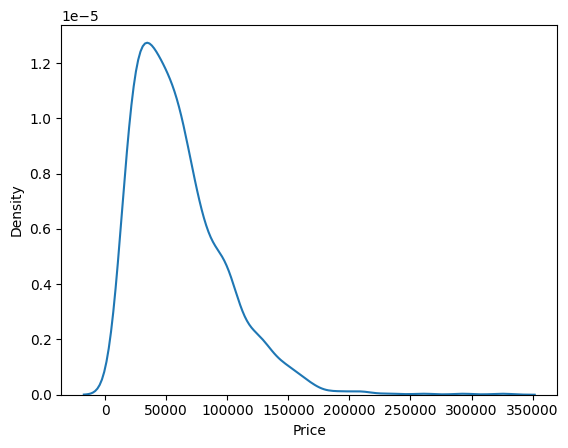

In [11]:
import seaborn as sns
sns.kdeplot(df['Price'])

<Axes: xlabel='count', ylabel='Company'>

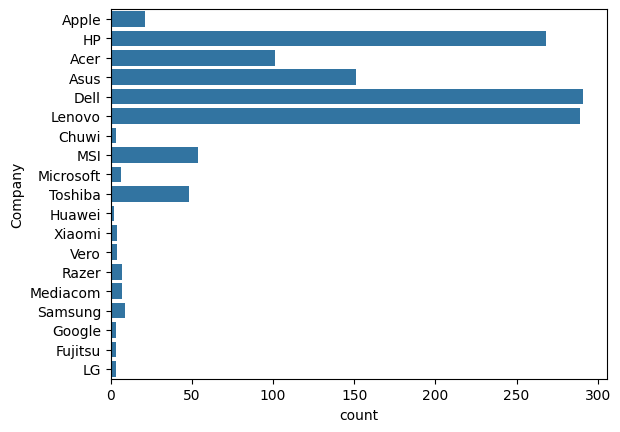

In [12]:
sns.countplot(df['Company'])

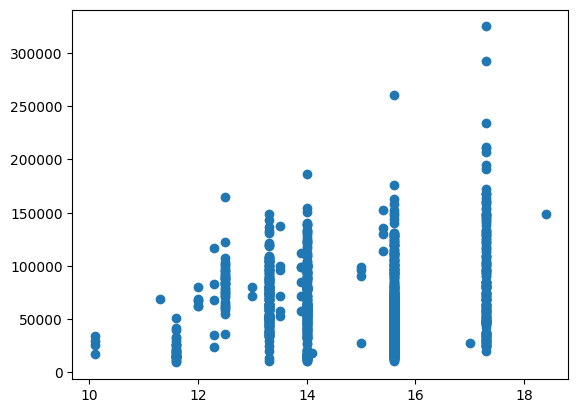

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Inches'], df['Price'])

In [14]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [15]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0


In [16]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [17]:
def screen_res_x(item):
    return (item.split('x')[0]).split(' ')[-1]

def screen_res_y(item):
    return item.split('x')[-1]

df['reso_x'], df['reso_y'] = df['ScreenResolution'].apply(screen_res_x), df['ScreenResolution'].apply(screen_res_y)

In [18]:
df['reso_x'] = df['reso_x'].astype('int64')
df['reso_y'] = df['reso_y'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  reso_x            1274 non-null   int64  
 14  reso_y            1274 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 159.2+ KB


In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,reso_x,reso_y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [21]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [22]:
df['PPI'] = pow((pow(df['reso_x'], 2) + pow(df['reso_y'], 2)), 0.5)/(df['Inches'])

In [23]:
df['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1269    100.454670
1270    157.350512
1271    276.053530
1272    111.935204
1273    100.454670
Name: PPI, Length: 1274, dtype: float64

In [24]:
df.drop(['ScreenResolution'], axis=1, inplace=True)

In [25]:
df.drop(['reso_x', 'reso_y', 'Inches'], axis=1, inplace=True)

In [26]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Cpu          1274 non-null   object 
 3   Ram          1274 non-null   int64  
 4   Memory       1274 non-null   object 
 5   Gpu          1274 non-null   object 
 6   OpSys        1274 non-null   object 
 7   Weight       1274 non-null   float64
 8   Price        1274 non-null   float64
 9   Touchscreen  1274 non-null   int64  
 10  IPS          1274 non-null   int64  
 11  PPI          1274 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 129.4+ KB


In [28]:
df['CPU Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split(' ')[0:3]))

In [29]:
df['CPU Name'][0:3]

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
Name: CPU Name, dtype: object

In [30]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [31]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

In [32]:
df['CPU Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [33]:
df.drop(['Cpu', 'CPU Name'], axis=1, inplace=True)

In [34]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [35]:
df['Ram'].value_counts()

Ram
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

In [36]:
def ssd(item):
    if 'SSD' in item.split():
        if 'GB' in (item).split()[item.split().index('SSD')-1]:
            return int((item).split()[item.split().index('SSD')-1].removesuffix('GB'))
        else:
            return int(int((item).split()[item.split().index('SSD')-1].removesuffix('TB')))*1000
    else:
        return 0

df['SSD'] = df['Memory'].apply(ssd)

In [37]:
def hdd(item):
    if 'HDD' in item.split():
        if 'GB' in (item).split()[item.split().index('HDD')-1]:
            return float((item).split()[item.split().index('HDD')-1].removesuffix('GB'))
        else:
            return float(((item).split()[item.split().index('HDD')-1].removesuffix('TB')))*1000
    else:
        return 0
    
df['HDD'] = df['Memory'].apply(hdd)

In [38]:
df['HDD'] = df['HDD'].apply(lambda x: int(x))

In [39]:
def hybrid(item):
    if 'Hybrid' in item.split():
        if 'GB' in (item).split()[item.split().index('Hybrid')-1]:
            return float((item).split()[item.split().index('Hybrid')-1].removesuffix('GB'))
        else:
            return float(((item).split()[item.split().index('Hybrid')-1].removesuffix('TB')))*1000
    else:
        return 0
    
df['Hybrid'] = df['Memory'].apply(hybrid)

In [40]:
df['Hybrid'] = df['Hybrid'].astype('int64')

In [41]:
def flash_storage(item):
    if 'Flash' in item.split():
        if 'GB' in (item).split()[item.split().index('Flash')-1]:
            return float((item).split()[item.split().index('Flash')-1].removesuffix('GB'))
        else:
            return float(((item).split()[item.split().index('Flash')-1].removesuffix('TB')))*1000
    else:
        return 0
    
df['Flash Storage'] = df['Memory'].apply(flash_storage)
df['Flash Storage'] = df['Flash Storage'].astype('int')

In [42]:
df['Flash Storage'].unique()

array([  0, 128, 256,  32,  64,  16, 512])

In [43]:
df.drop(['Memory'], axis=1, inplace=True)

In [44]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,SSD,HDD,Hybrid,Flash Storage
529,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,1.90,73366.56,0,0,141.211998,Intel Core i5,256,0,0,0
460,Acer,Notebook,4,Nvidia GeForce 940MX,Windows 10,2.23,28984.32,0,0,141.211998,Intel Core i3,0,1000,0,0
1170,HP,Notebook,8,Intel HD Graphics 520,Windows 10,1.96,36177.12,0,0,141.211998,Intel Core i7,256,0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   int64  
 3   Gpu            1274 non-null   object 
 4   OpSys          1274 non-null   object 
 5   Weight         1274 non-null   float64
 6   Price          1274 non-null   float64
 7   Touchscreen    1274 non-null   int64  
 8   IPS            1274 non-null   int64  
 9   PPI            1274 non-null   float64
 10  CPU Brand      1274 non-null   object 
 11  SSD            1274 non-null   int64  
 12  HDD            1274 non-null   int64  
 13  Hybrid         1274 non-null   int64  
 14  Flash Storage  1274 non-null   int32  
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 154.3+ KB


In [46]:
df.drop(['Hybrid', 'Flash Storage'], axis=1, inplace=True)

In [47]:
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0


In [48]:
df_1 = df.copy()

In [49]:
df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [50]:
df = df[df['GPU Brand'] != 'ARM']

In [51]:
df.drop(['Gpu'], axis=1, inplace=True)

In [52]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [53]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['OS'] = df['OpSys'].apply(cat_os)

In [54]:
df.drop(['OpSys'], axis=1, inplace=True)

In [55]:
df.info()
df_1 = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   IPS          1273 non-null   int64  
 7   PPI          1273 non-null   float64
 8   CPU Brand    1273 non-null   object 
 9   SSD          1273 non-null   int64  
 10  HDD          1273 non-null   int64  
 11  GPU Brand    1273 non-null   object 
 12  OS           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.2+ KB


<Axes: xlabel='Weight', ylabel='Density'>

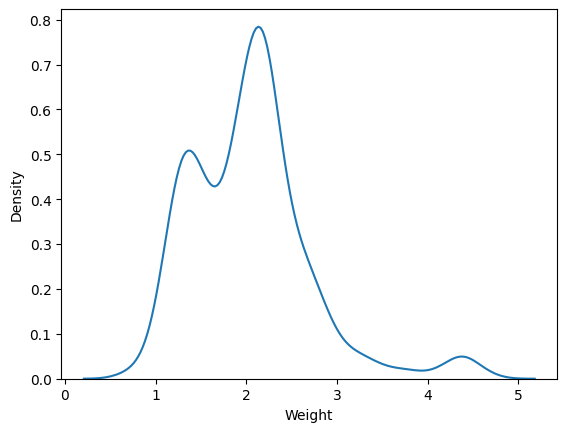

In [56]:
sns.kdeplot(df['Weight'])

<Axes: >

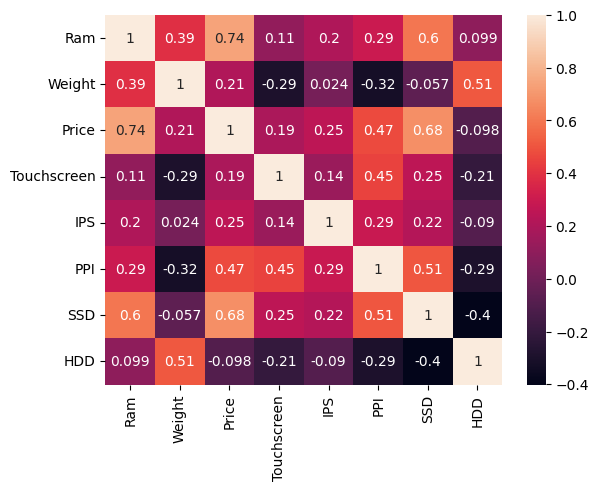

In [57]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Price', ylabel='Density'>

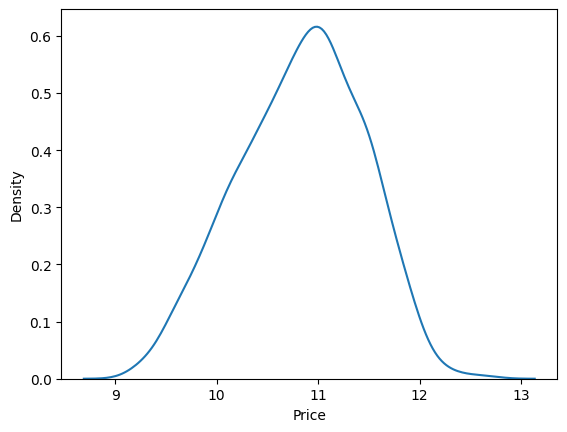

In [58]:
sns.kdeplot(np.log(df['Price']))
## It is better to apply log transformation

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   IPS          1273 non-null   int64  
 7   PPI          1273 non-null   float64
 8   CPU Brand    1273 non-null   object 
 9   SSD          1273 non-null   int64  
 10  HDD          1273 non-null   int64  
 11  GPU Brand    1273 non-null   object 
 12  OS           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.2+ KB


In [60]:
df = pd.get_dummies(data=df, columns=['Company', 'TypeName', 'CPU Brand', 'GPU Brand', 'OS'], dtype='int')

In [61]:
x = df.drop(['Price'], axis=1).values
y = np.array(np.log(df['Price']))

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [63]:
## Importing the all the possible regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Importing all the metrics
from sklearn.metrics import r2_score, mean_absolute_error

### Linear Regression

In [64]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [65]:
print('For Linear Regression :')
print(f'R2_score : {r2_score(y_test, model_1.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_1.predict(x_test))}')

For Linear Regression :
R2_score : 0.7845628130250162
MAE : 0.2212598443175607


### Ridge Regression

In [66]:
model_2 = Ridge(alpha=10)
model_2.fit(x_train, y_train)

Ridge(alpha=10)

In [67]:
print('For Ridge Regression :')
print(f'R2_score : {r2_score(y_test, model_2.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_2.predict(x_test))}')

For Ridge Regression :
R2_score : 0.795873416151829
MAE : 0.21807783036516956


### Lasso Regression

In [68]:
model_3 = Lasso(alpha=0.001)
model_3.fit(x_train, y_train)

Lasso(alpha=0.001)

In [69]:
print('For Lasso Regression :')
print(f'R2_score : {r2_score(y_test, model_3.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_3.predict(x_test))}')

For Lasso Regression :
R2_score : 0.7945692649288979
MAE : 0.21885264895833323


### KNN

In [70]:
model_4 = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model_4.fit(x_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [71]:
print('For KNN Regression :')
print(f'R2_score : {r2_score(y_test, model_4.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_4.predict(x_test))}')

For KNN Regression :
R2_score : 0.7490136142647448
MAE : 0.21093512370041687


### Decison Tree

In [72]:
model_5 = DecisionTreeRegressor(max_depth=8)
model_5.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [73]:
print('For Decision Tree Regression :')
print(f'R2_score : {r2_score(y_test, model_5.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_5.predict(x_test))}')

For Decision Tree Regression :
R2_score : 0.7984225579821118
MAE : 0.21198225541772214


### Random Forest

In [74]:
model_6 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model_6.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [75]:
print('For Random Forest Regression :')
print(f'R2_score : {r2_score(y_test, model_6.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_6.predict(x_test))}')

For Random Forest Regression :
R2_score : 0.8612152944173894
MAE : 0.17559173394549366


### ExtraTrees

In [76]:
model_7 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15, bootstrap=True)
model_7.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=15, max_features=0.75,
                    max_samples=0.5, random_state=3)

In [77]:
print('For Extra Tree Regression :')
print(f'R2_score : {r2_score(y_test, model_7.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_7.predict(x_test))}')

For Extra Tree Regression :
R2_score : 0.8679909081461743
MAE : 0.17209895126887276


### AdaBoost

In [78]:
model_8 = AdaBoostRegressor(n_estimators=15, learning_rate=1)
model_8.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=15)

In [79]:
print('For Adaboost Regression :')
print(f'R2_score : {r2_score(y_test, model_8.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_8.predict(x_test))}')

For Adaboost Regression :
R2_score : 0.792041670853255
MAE : 0.22502674523011473


### Gradient Boosting

In [80]:
model_9 = GradientBoostingRegressor(n_estimators=500)
model_9.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [81]:
print('For Gradient Boosting Regression :')
print(f'R2_score : {r2_score(y_test, model_9.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_9.predict(x_test))}')

For Gradient Boosting Regression :
R2_score : 0.8519659710960104
MAE : 0.17075298193233837


### XGBoost

In [82]:
model_10 = XGBRegressor(max_depth = 5, n_estimators=45, learning_rate=0.5)
model_10.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=45, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
print('For XGBoost Regression :')
print(f'R2_score : {r2_score(y_test, model_10.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_10.predict(x_test))}')

For XGBoost Regression :
R2_score : 0.8494010615085996
MAE : 0.17357673346314598


### Voting Regressor

In [84]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10, bootstrap=True)



model_11 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

In [85]:
model_11.fit(x_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=15,
                                                   max_features=0.75,
                                                   max_samples=0.5,
                                                   n_estimators=350,
                                                   random_state=3)),
                            ('gbdt',
                             GradientBoostingRegressor(max_features=0.5)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_ro...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=25,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('et',
                             ExtraTreesRegressor(bootstrap=True, max_depth=10,
                                                 max_features=0.75,
                                                 max_samples=0.5,
                                                 random_state=3))],
                weights=[5, 1, 1, 1])

In [86]:
print('For Voting Regression :')
print(f'R2_score : {r2_score(y_test, model_11.predict(x_test))}')
print(f'MAE : {mean_absolute_error(y_test, model_11.predict(x_test))}')

For Voting Regression :
R2_score : 0.8647867109364493
MAE : 0.17354886263478295


In [87]:
## Exporting the model
import pickle
pickle.dump(df_1, open('df.pkl', 'wb'))
pickle.dump(model_6, open('model.pkl', 'wb'))

In [88]:
df.drop(['Price'], axis=1).columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'SSD', 'HDD',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'CPU Brand_AMD Processor', 'CPU Brand_Intel Core i3',
       'CPU Brand_Intel Core i5', 'CPU Brand_Intel Core i7',
       'CPU Brand_Other Intel Processor', 'GPU Brand_AMD', 'GPU Brand_Intel',
       'GPU Brand_Nvidia', 'OS_Mac', 'OS_Others/No OS/Linux', 'OS_Windows'],
      dtype='object')